In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

from sklearn.utils import resample
from scipy import stats

# Sampling Distribution of a Statistic
data: https://www.kaggle.com/datasets/aryashah2k/beginners-sports-analytics-nfl-dataset?select=players.csv

In [2]:
playerImport = pd.read_csv("players.csv")
playerImport

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell
...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams


In [3]:
playerImport["height_inches"] = playerImport["height"].apply(lambda x: int(x.split("-")[0]) * 12 + int(x.split("-")[1]) if len(x.split("-")) == 2 else int(x))
playerImport

,nflId,height,weight,birthDate,collegeName,position,displayName,height_inches
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant,72
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford,70
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen,69
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones,73
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell,75
...,...,...,...,...,...,...,...,...
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East,74
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey,74
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion,78
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams,69


Text(0.5, 1.0, 'Central Limit Theorem')

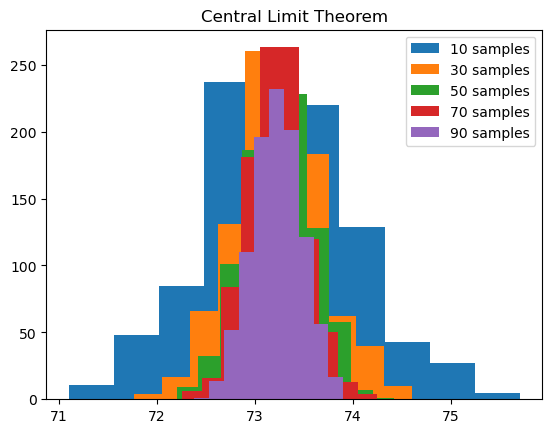

In [12]:
sample_amounts = range(10, 100, 20)
for x in sample_amounts:
    samples = []
    for i in range(1000):
        samples.append(.sample(x).mean())
    plt.hist(samples)
plt.legend([str(z) + " samples" for z in sample_amounts])
plt.title("Central Limit Theorem")

In [13]:
playerImport["height_inches"].sem()

0.06817808039608043

In [20]:
results = []
for nrepeat in range(1000):
    sample = resample(playerImport["height_inches"])
    results.append(sample.mean())
results = pd.Series(results)

print("Bootstraping Statistics:")
print(f'original: {playerImport["height_inches"].mean()}')
print(f'bias: {results.mean() - playerImport["height_inches"].mean()}')
print(f'std. error: {results.std()}')

Bootstraping Statistics:
original: 73.22026093630085
bias: -0.001036070606360795
std. error: 0.06663876557560025


## Confidence Intervals

In [24]:
data = playerImport["height_inches"].sample(20)

st.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))

(72.59597778326435, 74.50402221673565)

## Normal/Gaussian Distribution

((array([-3.13269090e+00, -2.86240960e+00, -2.71124085e+00, -2.60445496e+00,
         -2.52103830e+00, -2.45216961e+00, -2.39327695e+00, -2.34167369e+00,
         -2.29564214e+00, -2.25401521e+00, -2.21596250e+00, -2.18087139e+00,
         -2.14827658e+00, -2.11781604e+00, -2.08920237e+00, -2.06220345e+00,
         -2.03662904e+00, -2.01232119e+00, -1.98914727e+00, -1.96699480e+00,
         -1.94576754e+00, -1.92538245e+00, -1.90576741e+00, -1.88685932e+00,
         -1.86860270e+00, -1.85094845e+00, -1.83385292e+00, -1.81727714e+00,
         -1.80118612e+00, -1.78554840e+00, -1.77033549e+00, -1.75552160e+00,
         -1.74108324e+00, -1.72699897e+00, -1.71324918e+00, -1.69981586e+00,
         -1.68668245e+00, -1.67383370e+00, -1.66125548e+00, -1.64893473e+00,
         -1.63685932e+00, -1.62501798e+00, -1.61340021e+00, -1.60199621e+00,
         -1.59079683e+00, -1.57979349e+00, -1.56897816e+00, -1.55834331e+00,
         -1.54788184e+00, -1.53758709e+00, -1.52745276e+00, -1.51747292e+00,

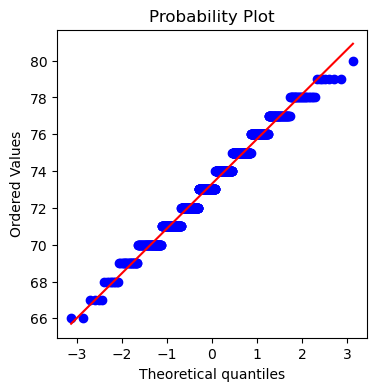

In [33]:
fig, ax = plt.subplots(figsize=(4, 4))
normSample = playerImport["height_inches"].sample(800)
stats.probplot(normSample, plot=ax)

<AxesSubplot:>

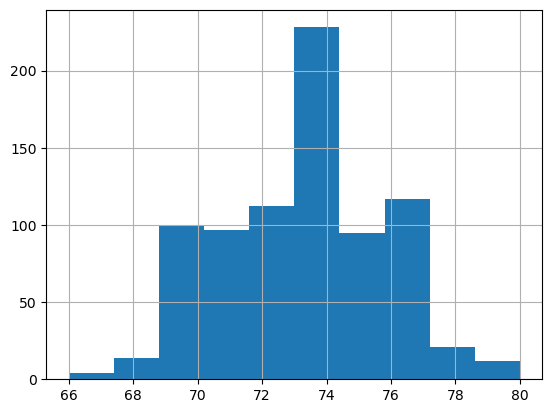

In [32]:
playerImport["height_inches"].sample(800).hist()

## Binomial Distribution

In [35]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [36]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144